Observations:

1.Charter schools have significantly better performance than district schools. All of charter schools have overall passing rate between 62-65% while all district schools have performance between 48-50%.

2.School size is another factor that impact the performance, the smaller the school is, the better the performance. Small schools (under 1787 students) have overall passing rate over 62%, medium schools(1787-2927 students) are between 49-63%, large schools (over 2927 students) are at 48-50%.


In [1]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
import matplotlib as plt
import seaborn as sns
%matplotlib inline

/Users/tramnguyen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_school = pd.read_csv('schools_complete.csv')
df_student = pd.read_csv('students_complete.csv')

In [3]:
# df_master: merge left with student
df_master = pd.merge(df_student,df_school,how='left',on='school_name')
df_master.drop('School ID',axis = 1)
df_master['count']=1

# Add Pass/ Fail indicator: 70 or higher
df_master['reading_pass']=[1 if x >=70 else 0 for x in df_student['reading_score']]
df_master['math_pass']=[1 if y >=70 else 0 for y in df_student['math_score']]

# Add budget_per_student
df_master['budget_per_student']=df_master['budget']/df_master['size']

## Modify raw data

In [13]:
No_of_schools = df_master['school_name'].nunique()
No_of_schools

15

In [14]:
Total_Schools = df_master['school_name'].nunique()
Total_Students = df_master['count'].sum()
Total_Budget = df_school['budget'].sum()
Average_Math_Score = df_master['math_score'].mean()
Average_Reading_Score = df_master['reading_score'].mean()
Passing_Math = 100.0 * df_master['math_pass'].sum()/df_master['count'].sum()
Passing_Reading = 100.0 * df_master['reading_pass'].sum()/df_master['count'].sum()
Overall_Passing_Rate = 100.0 * (df_master['math_pass'].sum()+df_master['reading_pass'].sum())/2/df_master['count'].sum()

In [5]:
district_summary=DataFrame(data = [Total_Schools,Total_Students,Total_Budget,
                                   Average_Math_Score,Average_Reading_Score,
                                  Passing_Math,Passing_Reading,Overall_Passing_Rate],
                          index= ['Total_Schools','Total_Students','Total_Budget',
                                   'Average_Math_Score','Average_Reading_Score',
                                  'Passing_Math','Passing_Reading','Overall_Passing_Rate'],
                          columns=['values'])

district_summary

,values
Total_Schools,1.500000e+01
Total_Students,3.917000e+04
Total_Budget,2.464943e+07
Average_Math_Score,7.898537e+01
Average_Reading_Score,8.187784e+01
Passing_Math,7.498085e+01
Passing_Reading,8.580546e+01
Overall_Passing_Rate,8.039316e+01


## School level

In [6]:
#Get school type from df_master by remove duplicated records
school_type = df_master[df_master[['school_name','type']].duplicated('school_name')==False][['school_name','type']]
# Group by school_name in df_master and calculate required variables
by_school = df_master.groupby('school_name')

In [18]:
summary = DataFrame(by_school['budget'].sum())
summary

,budget
school_name,
Bailey High School,15549641728
Cabrera High School,2009159448
Figueroa High School,5557128039
Ford High School,4831365924
Griffin High School,1346890000
Hernandez High School,14007062700
Holden High School,105933149
Huang High School,5573322295
Johnson High School,14733628650


In [7]:
s_summary = DataFrame(by_school['budget'].mean())
s_summary['students'] = by_school['student_name'].count()
s_summary.rename(columns = {'budget':'avg_budget','students':'students_count'})

,avg_budget,students_count
school_name,,
Bailey High School,3124928,4976
Cabrera High School,1081356,1858
Figueroa High School,1884411,2949
Ford High School,1763916,2739
Griffin High School,917500,1468
Hernandez High School,3022020,4635
Holden High School,248087,427
Huang High School,1910635,2917
Johnson High School,3094650,4761


In [108]:
School_summary = S_type.set_index('school_name')
School_summary['Total Students'] = by_school['student_name'].count()                                                       
School_summary['Total School Budget'] = by_school['budget'].mean()
School_summary['Per Student Budget'] = by_school['budget_per_student'].mean()
School_summary['Average Math Score'] = by_school['math_score'].mean()
School_summary['Average Reading Score']= by_school['reading_score'].mean()
School_summary['% Passing Math'] = by_school['math_pass'].sum() / by_school['student_name'].count() *100
School_summary['% Passing Reading'] = by_school['reading_pass'].sum() / by_school['student_name'].count() *100
School_summary['Overall Passing Rate'] = (by_school['reading_pass'].sum()+by_school['math_pass'].sum())/2/by_school['student_name'].count()*100
School_summary['School Name']= School_summary.index
School_summary.set_index(Series(range(15)))
School_summary

,type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate,School Name
school_name,,,,,,,,,,
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,73.500171,Huang High School
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,73.363852,Figueroa High School
Shelton High School,Charter,1761,1056600,600.0,83.359455,83.725724,93.867121,95.854628,94.860875,Shelton High School
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,66.752967,80.862999,73.807983,Hernandez High School
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,95.265668,Griffin High School
Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,93.867718,96.539641,95.203679,Wilson High School
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652,Cabrera High School
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,74.306672,Bailey High School
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,92.505855,96.252927,94.379391,Holden High School


In [8]:
Top_5_overall_passing = School_summary.sort_values(by = 'Overall Passing Rate',ascending = False).head(5)
Bottom_5_overall_passing = School_summary.sort_values(by = 'Overall Passing Rate',ascending = True).head(5)

In [9]:
# Math score by grade for each school
math_by_grade = pd.pivot_table(df_master,values = ['math_score'],
                          index = ['school_name'],columns = ['grade'],aggfunc='mean')
math_by_grade = math_by_grade.reindex(columns=['9th','10th','11th','12th'],level = 1)

# Reading score by grade for each school
reading_by_grade = pd.pivot_table(df_master,values = ['reading_score'],
                          index = ['school_name'],columns = ['grade'],aggfunc='mean')
reading_by_grade = reading_by_grade.reindex(columns=['9th','10th','11th','12th'],level = 1)

In [10]:
School_summary['Spending_group'] = pd.qcut(School_summary['Per Student Budget'],q =4,
                            labels=['G1. 578-591.5','G2. 591.5-628','G3. 628-641.5','G4. 641.5-655'])
Performance_by_spending = School_summary.set_index(keys =['Spending_group','School Name']).sort_index()
Performance_by_spending.drop(columns = ['type','Total Students','Total School Budget','Per Student Budget'])

Average Math Score  \
Spending_group School Name                                 
G1. 578-591.5  Cabrera High School             83.061895   
               Holden High School              83.803279   
               Wilson High School              83.274201   
               Wright High School              83.682222   
G2. 591.5-628  Bailey High School              77.048432   
               Griffin High School             83.351499   
               Pena High School                83.839917   
               Shelton High School             83.359455   
G3. 628-641.5  Figueroa High School            76.711767   
               Rodriguez High School           76.842711   
               Thomas High School              83.418349   
G4. 641.5-655  Ford High School                77.102592   
               Hernandez High School           77.289752   
               Huang High School               76.629414   
               Johnson High School             77.072464   

                                      Average Reading Score  % Passing Math  \
Spending_group School Name                                                    
G1. 578-591.5  Cabrera High School                83.975780       94.133477   
               Holden High School                 83.814988       92.505855   
               Wilson High School                 83.989488       93.867718   
               Wright High School                 83.955000       93.333333   
G2. 591.5-628  Bailey High School                 81.033963       66.680064   
               Griffin High School                83.816757       93.392371   
               Pena High School                   84.044699       94.594595   
               Shelton High School                83.725724       93.867121   
G3. 628-641.5  Figueroa High School               81.158020       65.988471   
               Rodriguez High School              80.744686       66.366592   
               Thomas High School                 83.848930       93.272171   
G4. 641.5-655  Ford High School                   80.746258       68.309602   
               Hernandez High School              80.934412       66.752967   
               Huang High School                  81.182722       65.683922   
               Johnson High School                80.966394       66.057551   

                                      % Passing Reading  Overall Passing Rate  
Spending_group School Name                                                     
G1. 578-591.5  Cabrera High School            97.039828             95.586652  
               Holden High School             96.252927             94.379391  
               Wilson High School             96.539641             95.203679  
               Wright High School             96.611111             94.972222  
G2. 591.5-628  Bailey High School             81.933280             74.306672  
               Griffin High School            97.138965             95.265668  
               Pena High School               95.945946             95.270270  
               Shelton High School            95.854628             94.860875  
G3. 628-641.5  Figueroa High School           80.739234             73.363852  
               Rodriguez High School          80.220055             73.293323  
               Thomas High School             97.308869             95.290520  
G4. 641.5-655  Ford High School               79.299014             73.804308  
               Hernandez High School          80.862999             73.807983  
               Huang High School              81.316421             73.500171  
               Johnson High School            81.222432             73.639992

In [11]:
pd.qcut(School_summary['Total Students'],q =3)
School_summary['Size_group'] = pd.qcut(School_summary['Total Students'],q =3,
                            labels=['1.Small: 426-1787','2.Medium: 1787-2927','3.Large: 2927-4976'])
Performance_by_size = School_summary.set_index(keys =['Size_group','School Name']).sort_index()
Performance_by_size.drop(columns = ['type','Total Students','Total School Budget','Per Student Budget','Spending_group'])

Average Math Score  \
Size_group          School Name                                 
1.Small: 426-1787   Griffin High School             83.351499   
                    Holden High School              83.803279   
                    Pena High School                83.839917   
                    Shelton High School             83.359455   
                    Thomas High School              83.418349   
2.Medium: 1787-2927 Cabrera High School             83.061895   
                    Ford High School                77.102592   
                    Huang High School               76.629414   
                    Wilson High School              83.274201   
                    Wright High School              83.682222   
3.Large: 2927-4976  Bailey High School              77.048432   
                    Figueroa High School            76.711767   
                    Hernandez High School           77.289752   
                    Johnson High School             77.072464   
                    Rodriguez High School           76.842711   

                                           Average Reading Score  \
Size_group          School Name                                    
1.Small: 426-1787   Griffin High School                83.816757   
                    Holden High School                 83.814988   
                    Pena High School                   84.044699   
                    Shelton High School                83.725724   
                    Thomas High School                 83.848930   
2.Medium: 1787-2927 Cabrera High School                83.975780   
                    Ford High School                   80.746258   
                    Huang High School                  81.182722   
                    Wilson High School                 83.989488   
                    Wright High School                 83.955000   
3.Large: 2927-4976  Bailey High School                 81.033963   
                    Figueroa High School               81.158020   
                    Hernandez High School              80.934412   
                    Johnson High School                80.966394   
                    Rodriguez High School              80.744686   

                                           % Passing Math  % Passing Reading  \
Size_group          School Name                                                
1.Small: 426-1787   Griffin High School         93.392371          97.138965   
                    Holden High School          92.505855          96.252927   
                    Pena High School            94.594595          95.945946   
                    Shelton High School         93.867121          95.854628   
                    Thomas High School          93.272171          97.308869   
2.Medium: 1787-2927 Cabrera High School         94.133477          97.039828   
                    Ford High School            68.309602          79.299014   
                    Huang High School           65.683922          81.316421   
                    Wilson High School          93.867718          96.539641   
                    Wright High School          93.333333          96.611111   
3.Large: 2927-4976  Bailey High School          66.680064          81.933280   
                    Figueroa High School        65.988471          80.739234   
                    Hernandez High School       66.752967          80.862999   
                    Johnson High School         66.057551          81.222432   
                    Rodriguez High School       66.366592          80.220055   

                                           Overall Passing Rate  
Size_group          School Name                                  
1.Small: 426-1787   Griffin High School               95.265668  
                    Holden High School                94.379391  
                    Pena High School                  95.270270  
                    Shelton High School               94.860875  
                    Tho

In [12]:
Performance_by_district = School_summary.set_index(keys = ['type','School Name']).sort_index()
Performance_by_district.drop(columns = ['Total Students','Total School Budget','Per Student Budget',
                                        'Spending_group','Size_group'])

Average Math Score  Average Reading Score  \
type     School Name                                                        
Charter  Cabrera High School             83.061895              83.975780   
         Griffin High School             83.351499              83.816757   
         Holden High School              83.803279              83.814988   
         Pena High School                83.839917              84.044699   
         Shelton High School             83.359455              83.725724   
         Thomas High School              83.418349              83.848930   
         Wilson High School              83.274201              83.989488   
         Wright High School              83.682222              83.955000   
District Bailey High School              77.048432              81.033963   
         Figueroa High School            76.711767              81.158020   
         Ford High School                77.102592              80.746258   
         Hernandez High School           77.289752              80.934412   
         Huang High School               76.629414              81.182722   
         Johnson High School             77.072464              80.966394   
         Rodriguez High School           76.842711              80.744686   

                                % Passing Math  % Passing Reading  \
type     School Name                                                
Charter  Cabrera High School         94.133477          97.039828   
         Griffin High School         93.392371          97.138965   
         Holden High School          92.505855          96.252927   
         Pena High School            94.594595          95.945946   
         Shelton High School         93.867121          95.854628   
         Thomas High School          93.272171          97.308869   
         Wilson High School          93.867718          96.539641   
         Wright High School          93.333333          96.611111   
District Bailey High School          66.680064          81.933280   
         Figueroa High School        65.988471          80.739234   
         Ford High School            68.309602          79.299014   
         Hernandez High School       66.752967          80.862999   
         Huang High School           65.683922          81.316421   
         Johnson High School         66.057551          81.222432   
         Rodriguez High School       66.366592          80.220055   

                                Overall Passing Rate  
type     School Name                                  
Charter  Cabrera High School               95.586652  
         Griffin High School               95.265668  
         Holden High School                94.379391  
         Pena High School                  95.270270  
         Shelton High School               94.860875  
         Thomas High School                95.290520  
         Wilson High School                95.203679  
         Wright High School                94.972222  
District Bailey High School                74.306672  
         Figueroa High School              73.363852  
         Ford High School                  73.804308  
         Hernandez High School             73.807983  
         Huang High School                 73.500171  
         Johnson High School               73.639992  
         Rodriguez High School             73.293323

In [13]:
df_master.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget,count,reading_pass,math_pass,budget_per_student
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635,1,0,1,655.0
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635,1,1,0,655.0
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635,1,1,0,655.0
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635,1,0,0,655.0
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635,1,1,1,655.0


In [14]:
df_master.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget,count,reading_pass,math_pass,budget_per_student
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635,1,0,1,655.0
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635,1,1,0,655.0
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635,1,1,0,655.0
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635,1,0,0,655.0
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635,1,1,1,655.0


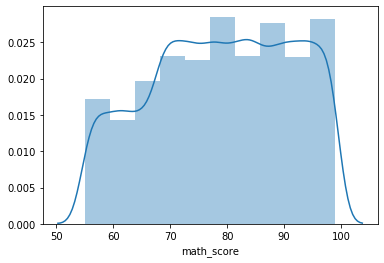

In [15]:
sns.distplot(df_master['math_score'],bins = 10)